# Part 1: Linear Regression with One Feature

**Objective**: Function of stellar mass ($M$) using linear regression.

## 1. Dataset and Notation

*   $M$: stellar mass
*   $L$: stellar luminosity

In [2]:
import numpy as np
import matplotlib.pyplot as plt

M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

## 2. Dataset Visualization
Plot $M$ vs $L$

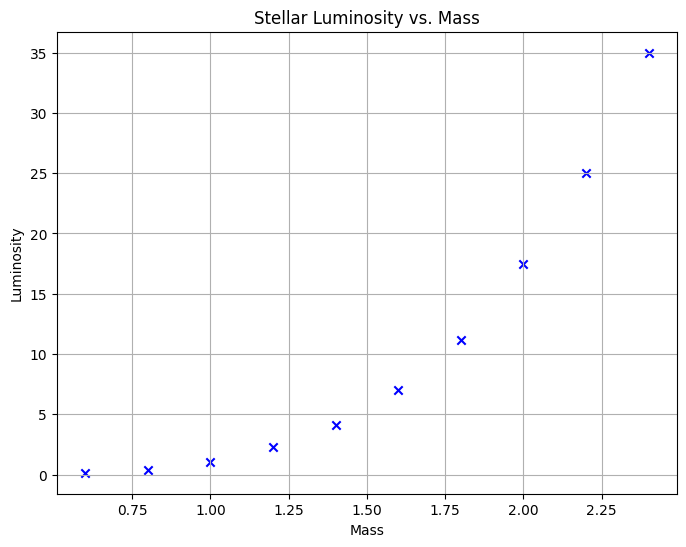

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(M, L, color='blue', marker='x', label='Data')
plt.title('Stellar Luminosity vs. Mass')
plt.xlabel('Mass')
plt.ylabel('Luminosity')
plt.grid(True)

**Linearity**: The relationship between Mass and Luminosity appears to be non-linear. As Mass increases, Luminosity increases much more rapidly 

**Plausibility**: A simple linear model could underfit the data

## 3. Model and Loss Function
Model: $\hat{L} = wM + b$

Loss (MSE): $J(w,b) = \frac{1}{2m} \sum_{i=1}^m (\hat{L}^{(i)} - L^{(i)})^2$

In [9]:
def predict(x, w, b):
    return w * x + b

def compute_cost(x, y, w, b):
    m = len(y)
    predictions = predict(x, w, b)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

## 4. Cost Surface visualization
Evaluate $J(w,b)$ on a grid and plot the surface/contour.

Text(0.5, 0.92, 'Cost Surface J(w, b)')

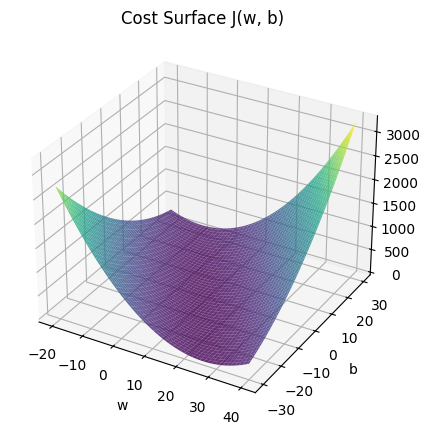

In [11]:
w_vals = np.linspace(-20, 40, 100)
b_vals = np.linspace(-30, 30, 100)
W, B = np.meshgrid(w_vals, b_vals)
J_vals = np.zeros_like(W)

for i in range(len(w_vals)):
    for j in range(len(b_vals)):
        J_vals[j, i] = compute_cost(M, L, w_vals[i], b_vals[j])

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(W, B, J_vals, cmap='viridis', alpha=0.8)
ax1.set_xlabel('w')
ax1.set_ylabel('b')
ax1.set_title('Cost Surface J(w, b)')


## 5. Gradients
Derivatives:
$$\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^m (\hat{L}^{(i)} - L^{(i)}) M^{(i)}$$
$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\hat{L}^{(i)} - L^{(i)})$$

In [12]:
def compute_gradient_loop(x, y, w, b):
    m = len(y)
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        pred = w * x[i] + b
        error = pred - y[i]
        dj_dw += error * x[i]
        dj_db += error
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

def compute_gradient_vectorized(x, y, w, b):
    m = len(y)
    predictions = w * x + b
    errors = predictions - y
    
    dj_dw = (1/m) * np.dot(errors, x)
    dj_db = (1/m) * np.sum(errors)
    
    return dj_dw, dj_db

## 6. Gradient Descent Implementation
Updates:
$w := w - \alpha \frac{\partial J}{\partial w}$
$b := b - \alpha \frac{\partial J}{\partial b}$

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, gradient_function):
    w = w_in
    b = b_in
    J_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        J_history.append(compute_cost(x, y, w, b))
        
        if i % (num_iters // 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.4f} | w: {w:8.4f}, b: {b:8.4f}")
            
    return w, b, J_history

## 7. Experiments and Convergence


Running Gradient Descent with alpha = 0.001
Iteration    0: Cost 117.1272 | w:   0.0215, b:   0.0104
Iteration  100: Cost  76.1380 | w:   1.8528, b:   0.8539
Iteration  200: Cost  55.5054 | w:   3.1775, b:   1.3941
Iteration  300: Cost  45.0036 | w:   4.1445, b:   1.7209
Iteration  400: Cost  39.5456 | w:   4.8589, b:   1.8976
Iteration  500: Cost  36.6010 | w:   5.3949, b:   1.9691
Iteration  600: Cost  34.9110 | w:   5.8048, b:   1.9668
Iteration  700: Cost  33.8494 | w:   6.1253, b:   1.9130
Iteration  800: Cost  33.1044 | w:   6.3826, b:   1.8233
Iteration  900: Cost  32.5210 | w:   6.5950, b:   1.7088

Running Gradient Descent with alpha = 0.01
Iteration    0: Cost 112.0896 | w:   0.2152, b:   0.1036
Iteration  100: Cost  31.9704 | w:   6.8004, b:   1.5699
Iteration  200: Cost  28.0913 | w:   7.9674, b:  -0.0073
Iteration  300: Cost  24.9336 | w:   8.8900, b:  -1.5257
Iteration  400: Cost  22.3208 | w:   9.7253, b:  -2.9093
Iteration  500: Cost  20.1590 | w:  10.4849, b:  -4.1680

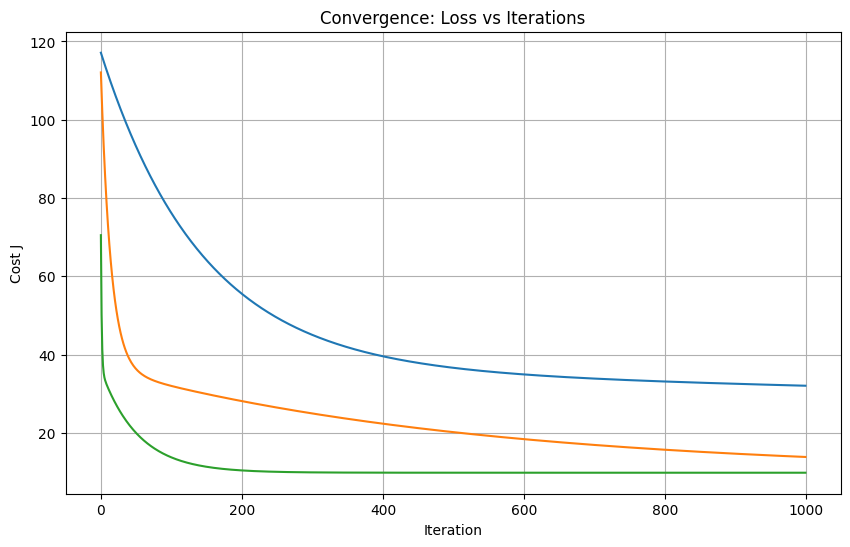

In [20]:
initial_w = 0
initial_b = 0
iterations = 1000

learning_rates = [0.001, 0.01, 0.1]
results = {}

plt.figure(figsize=(10, 6))

for alpha in learning_rates:
    print(f"\nRunning Gradient Descent with alpha = {alpha}")
    w_final, b_final, J_hist = gradient_descent(M, L, initial_w, initial_b, alpha, iterations, compute_gradient_vectorized)
    results[alpha] = (w_final, b_final, J_hist)
    
    plt.plot(J_hist, label=f'alpha={alpha}')

plt.title('Convergence: Loss vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost J')
plt.grid(True)


### Results Analysis
The plot above shows the learning curves.
- **Small alpha**: Converges slowly.
- **Good alpha**: Converges steadily.
- **Large alpha**: Might converge very fast or oscillate/diverge if too large.

Final parameters for best alpha:

In [16]:
best_alpha = 0.1
w_opt, b_opt, _ = results[best_alpha]
print(f"Best Alpha: {best_alpha}")
print(f"Final w: {w_opt:.4f}")
print(f"Final b: {b_opt:.4f}")
print(f"Final Cost: {compute_cost(M, L, w_opt, b_opt):.4f}")

Best Alpha: 0.1
Final w: 18.1294
Final b: -16.8340
Final Cost: 9.7951


## 8. Final Fit Plot

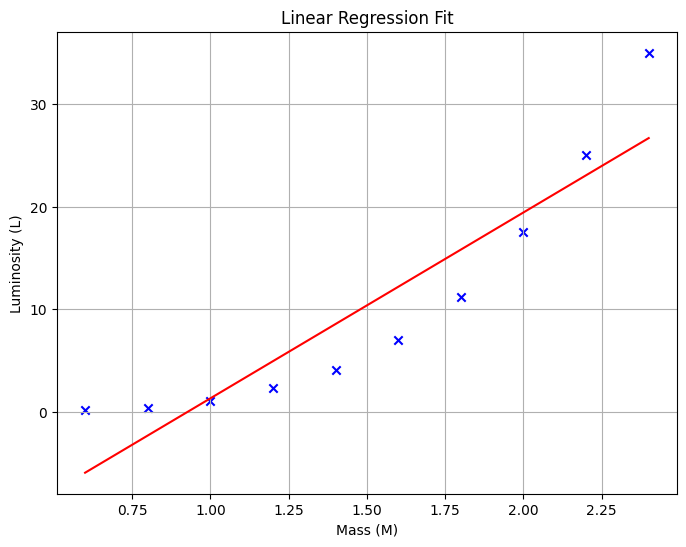

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(M, L, color='blue', marker='x', label='Data')

x_range = np.linspace(min(M), max(M), 100)
y_pred_line = predict(x_range, w_opt, b_opt)
plt.plot(x_range, y_pred_line, color='red', label=f'Model: L = {w_opt:.2f}M + {b_opt:.2f}')

plt.title('Linear Regression Fit')
plt.xlabel('Mass (M)')
plt.ylabel('Luminosity (L)')
plt.grid(True)


## 9. Conceptual Questions

**1. Astrophysical meaning of w**:
*   $w$ represents the slope of the linear relationship, how much Luminosity increases for every unit increase in Mass. 

**2. Why is a linear model limited here?**:
*   The data points clearly curve upward while the line is straight the model underestimates high and low mass stars and overestimates medium mass stars.